# Week 1 


# Signal Representation and Sampling

1) Generate a sine wave of frequency 10 Hz with:
Duration = 2seconds and
Sampling rate = 500 Hz.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
freq=10
duration=2
samplingrate=500
time_cont=np.linspace(0,duration,duration*samplingrate)
sineval_cont=np.sin(2*np.pi*freq*time_cont)

2) Plot the continuous signal and a discretized version sampled at 40 Hz.

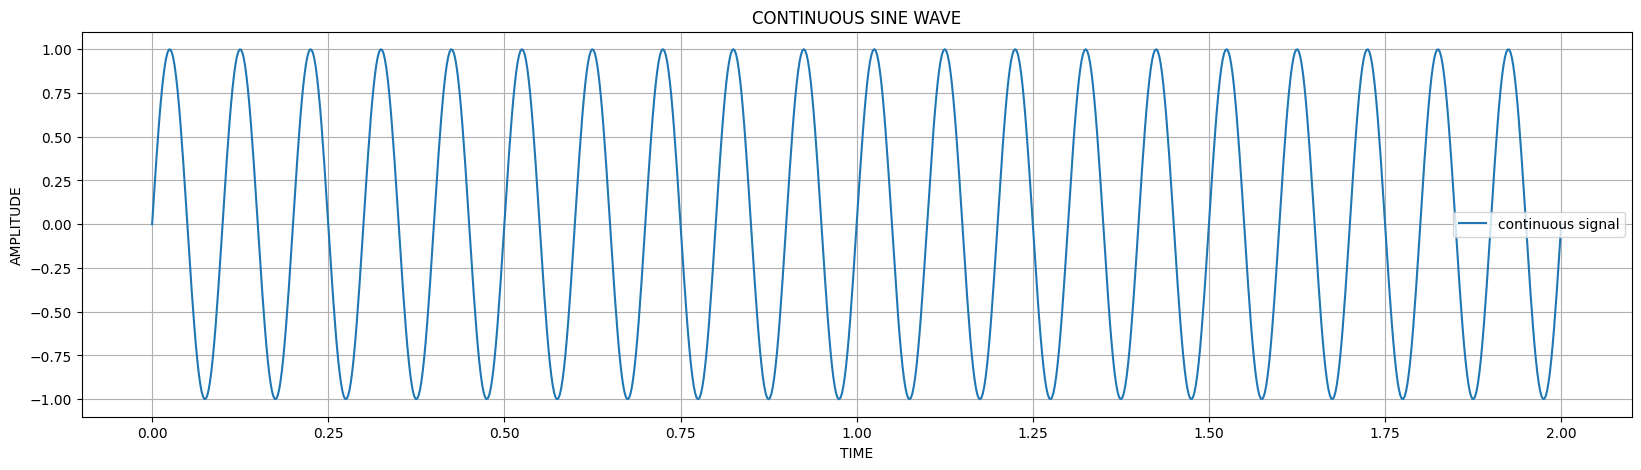

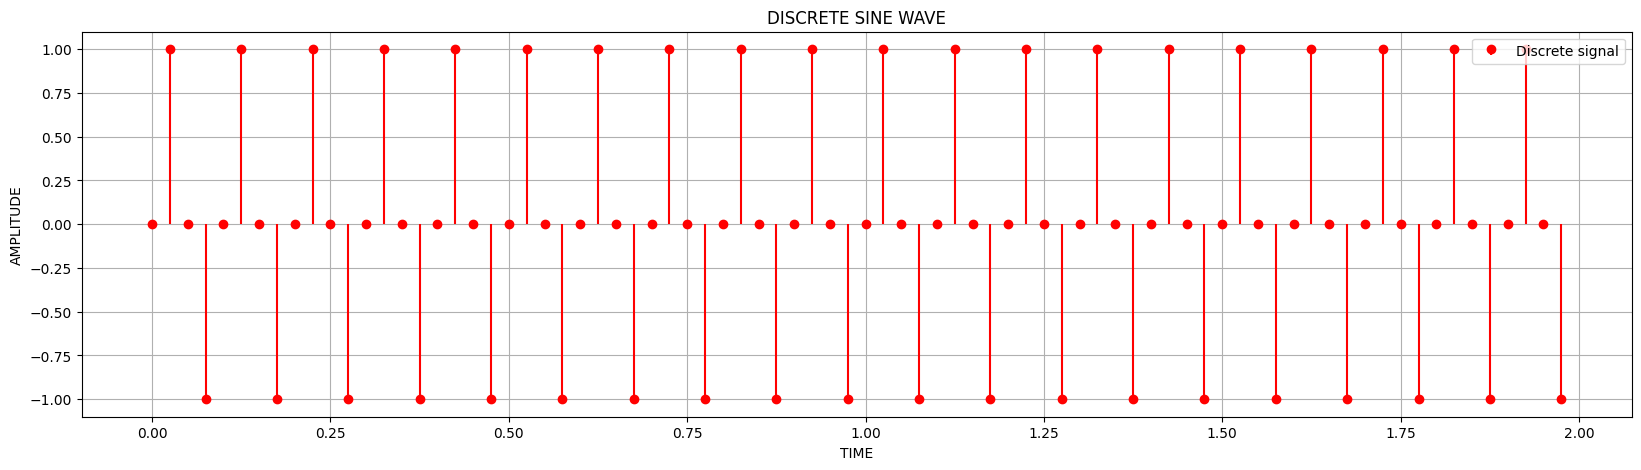

In [10]:
plt.figure(figsize=(20,5))
plt.plot(time_cont,sineval_cont,label='continuous signal')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('CONTINUOUS SINE WAVE')
plt.grid()
plt.legend()
plt.show()

samp_rate2=40
time_disc=np.linspace(0,duration,int(duration*samp_rate2),endpoint=False)
sineval_disc=np.sin(2*np.pi*freq*time_disc)
plt.figure(figsize=(20,5))
plt.stem(time_disc,sineval_disc,linefmt='r-', markerfmt='ro', basefmt=" ",label='Discrete signal')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DISCRETE SINE WAVE')
plt.grid()
plt.legend()
plt.show()

3) Experiment: Vary the sampling rate (e.g., 20 Hz, 50 Hz, 100 Hz) and observe the effect on the discrete signal.


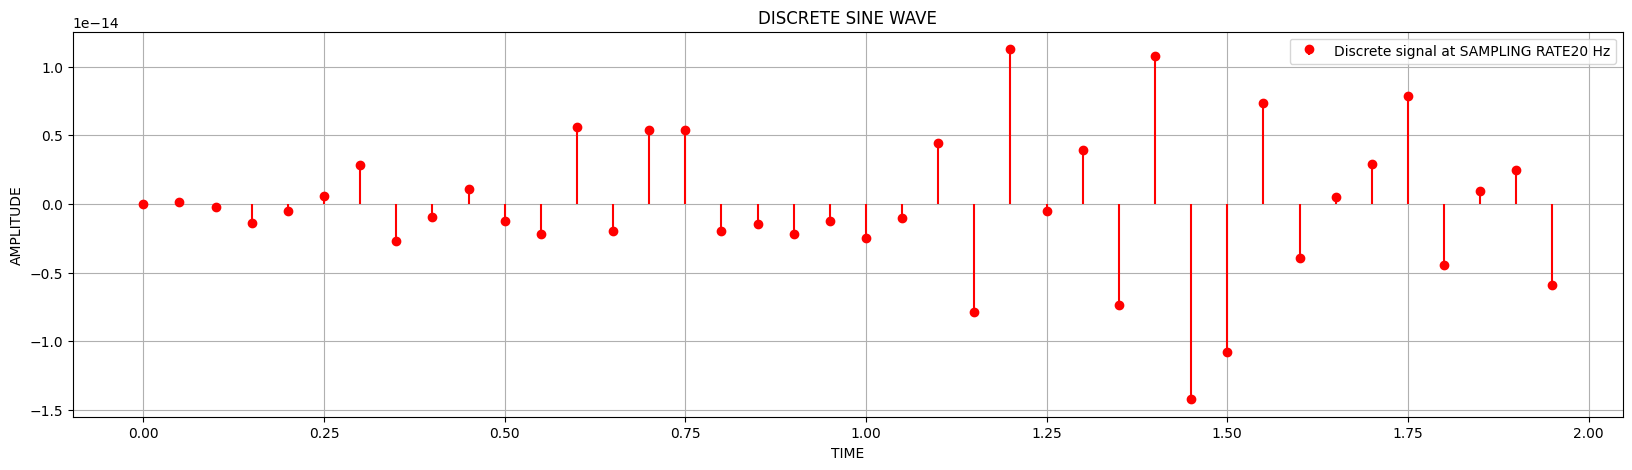

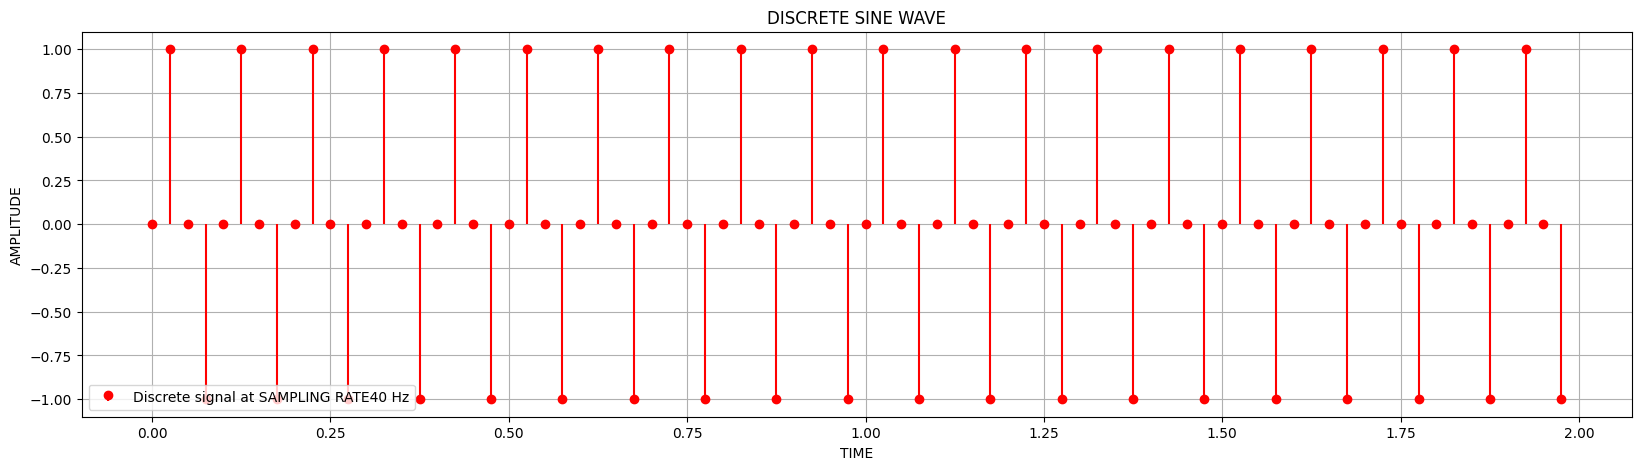

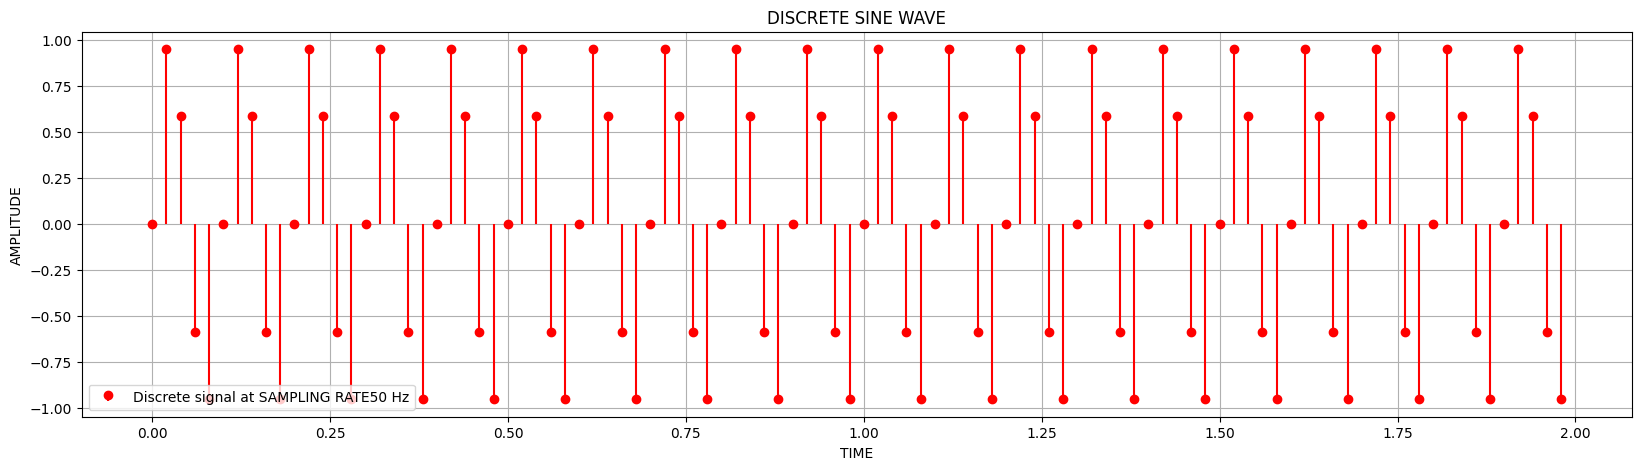

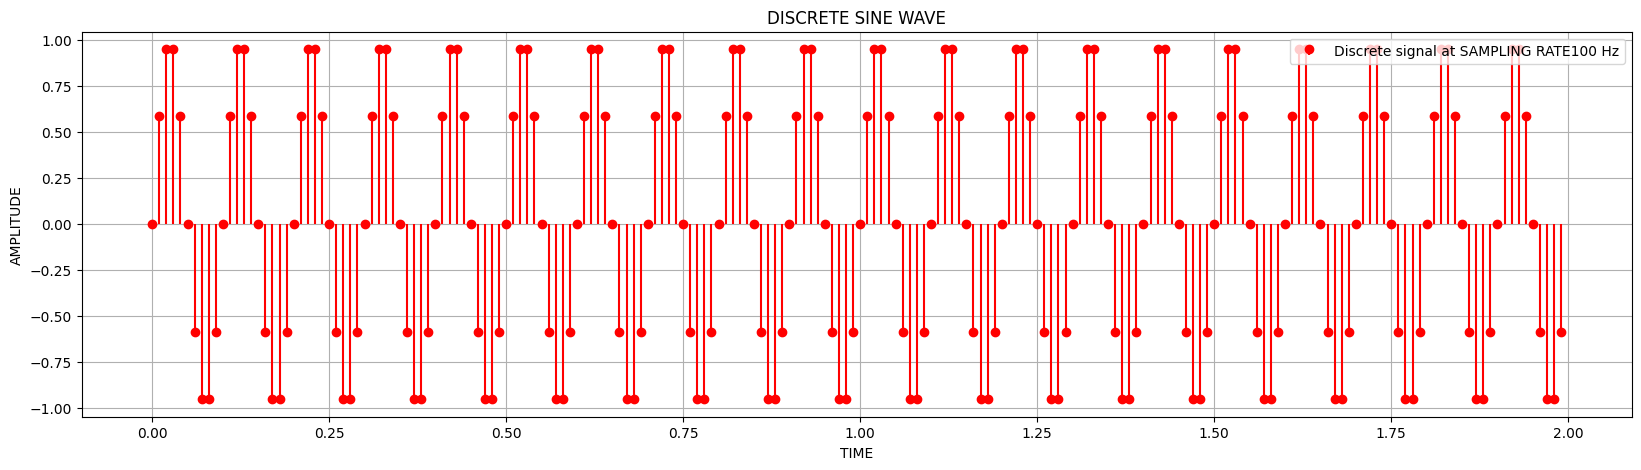

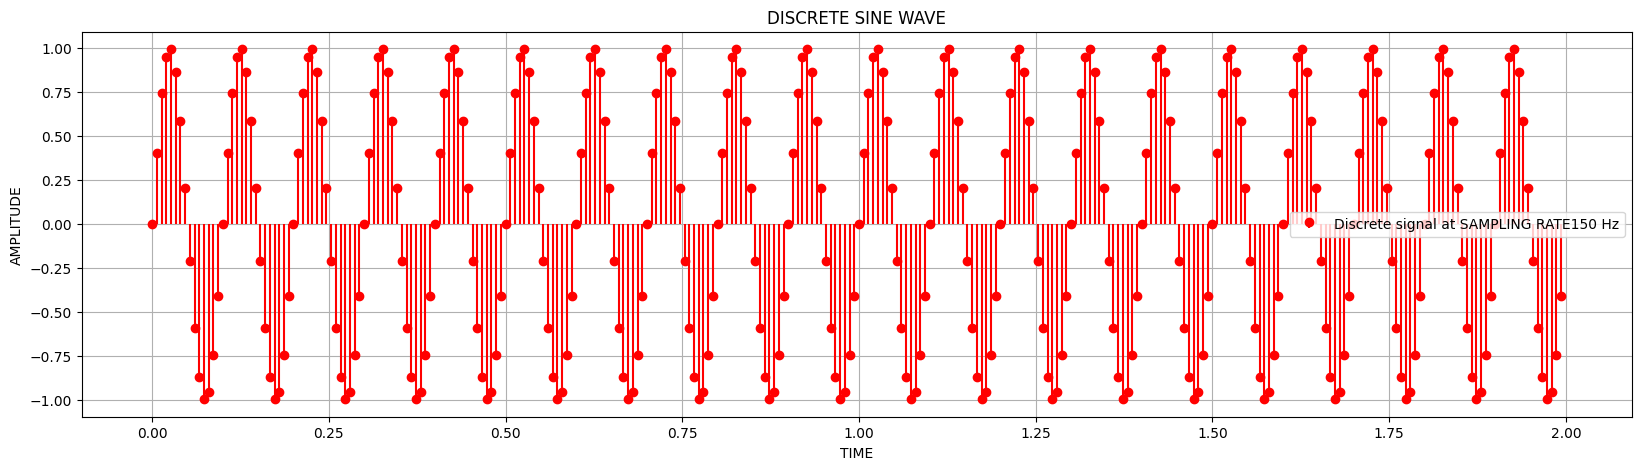

In [20]:
samp_rates=[20,40,50,100,150]
for samp_r in samp_rates:
  time_disc=np.linspace(0,duration,int(duration*samp_r),endpoint=False)
  sineval_disc=np.sin(2*np.pi*freq*time_disc)
  plt.figure(figsize=(20,5))
  plt.stem(time_disc,sineval_disc,linefmt='r-', markerfmt='ro', basefmt=" ",label='Discrete signal at SAMPLING RATE'+str(samp_r)+' Hz')
  plt.xlabel('TIME')
  plt.ylabel('AMPLITUDE')
  plt.title('DISCRETE SINE WAVE')
  plt.grid(True)
  plt.legend()
plt.show()

# Fourier Transform and Frequency Domain Analysis

1) Generate a composite signal by summing two sine waves with frequencies 5 Hz and 20 Hz.

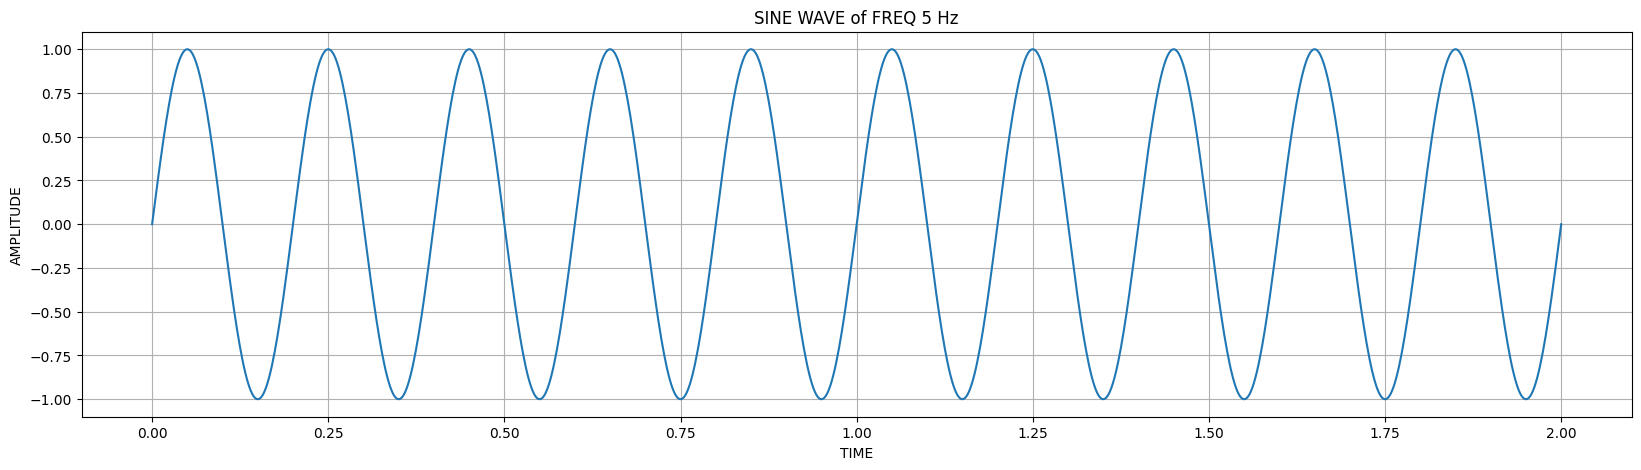

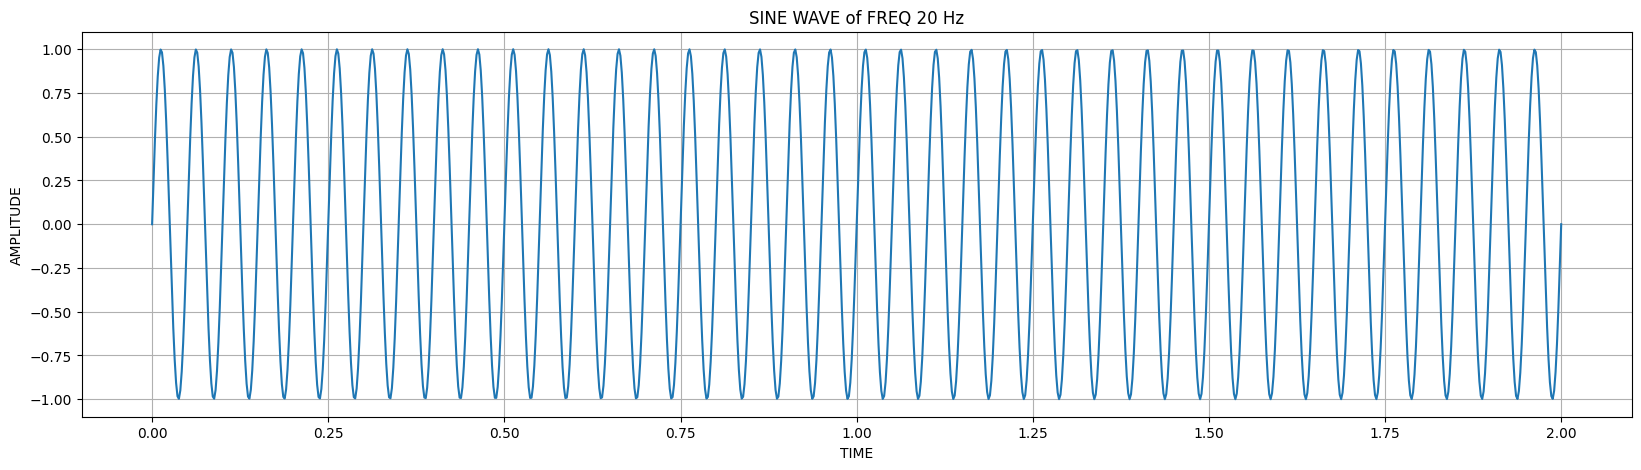

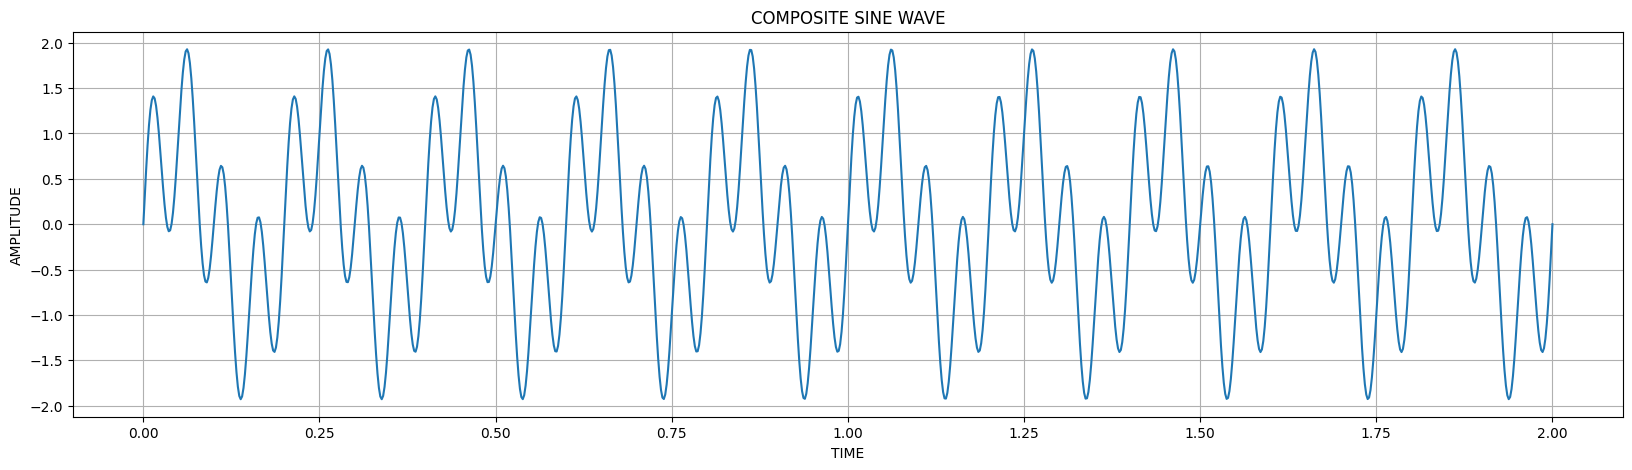

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

In [ ]:
freq1=5
freq2=20
sineval_cont1=np.sin(2*np.pi*freq1*time_cont)
sineval_cont2=np.sin(2*np.pi*freq2*time_cont)
sinewave_comp=sineval_cont1+sineval_cont2

plt.figure(figsize=(20,5))
plt.plot(time_cont,sineval_cont1,label='First signal at 5 Hz')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('SINE WAVE of FREQ 5 Hz')
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(time_cont,sineval_cont2,label='First signal at 20 Hz')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('SINE WAVE of FREQ 20 Hz')
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(time_cont,sinewave_comp,label='composite signal')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('COMPOSITE SINE WAVE')
plt.grid()
plt.show()
plt.figure(figsize=(20,5))


2) Perform the Fourier Transform (FT) on the composite signal,
plot the magnitude spectrum and identify the prominent frequency components.

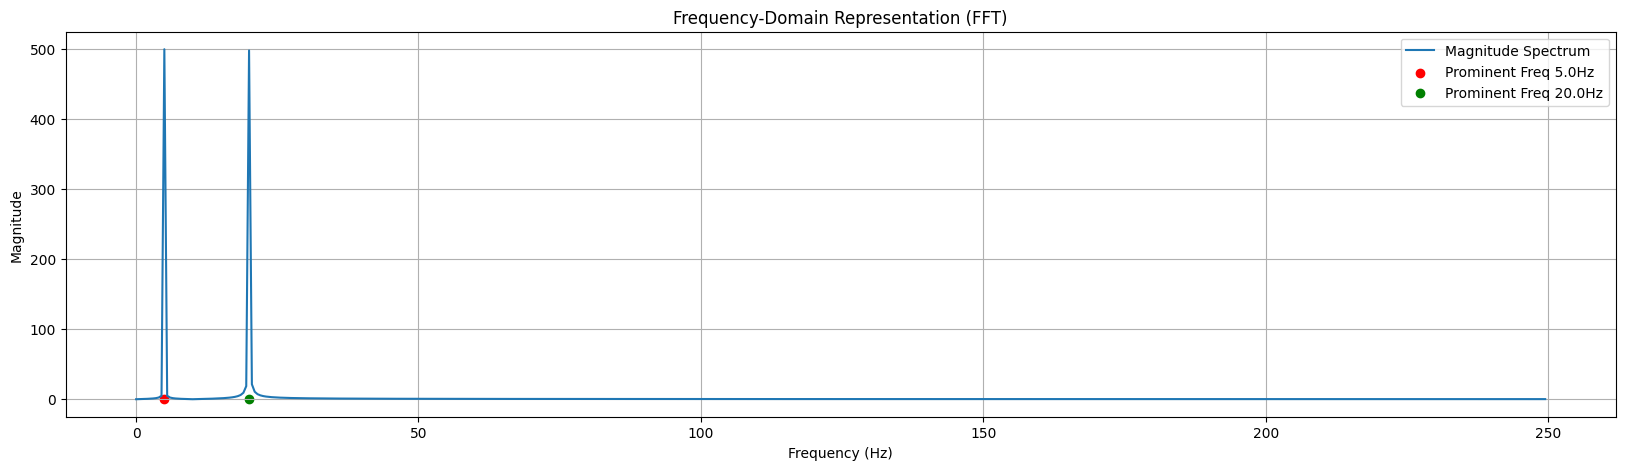

In [ ]:
from scipy.signal import find_peaks
n=len(sinewave_comp)
ft=np.fft.fft(sinewave_comp)
freq=np.fft.fftfreq(n,1/samplingrate)
mag=np.abs(ft)
peaks= find_peaks(mag[:n//2], height=10)[0]
plt.figure(figsize=(20,5))
plt.plot(freq[:n//2],mag[:n//2],label="Magnitude Spectrum")
colors = ['red', 'green']
ct=0
for p in peaks:
  plt.scatter(freq[p],0, color=colors[ct], label='Prominent Freq '+str(round(freq[p],2))+'Hz')
  ct=ct+1
plt.title("Frequency-Domain Representation (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

# Audio Signal Analysis

1) Upload like 5 audio but belonging to the same category, like animals, music instruments and stuff (e.g.wav or .mp3) and load it using librosa.

In [ ]:
from google.colab import files
uploaded = files.upload()
import librosa
signal1,sr1=librosa.load('s1.wav',sr=None)
signal2,sr2=librosa.load('s2.wav',sr=None)
signal3,sr3=librosa.load('s3.wav',sr=None)
signal4,sr4=librosa.load('s4.wav',sr=None)
signal5,sr5=librosa.load('s5.wav',sr=None)

Saving s1.wav to s1.wav
Saving s2.wav to s2.wav
Saving s3.wav to s3.wav
Saving s4.wav to s4.wav
Saving s5.wav to s5.wav


2) Plot the waveform of the audio signal.

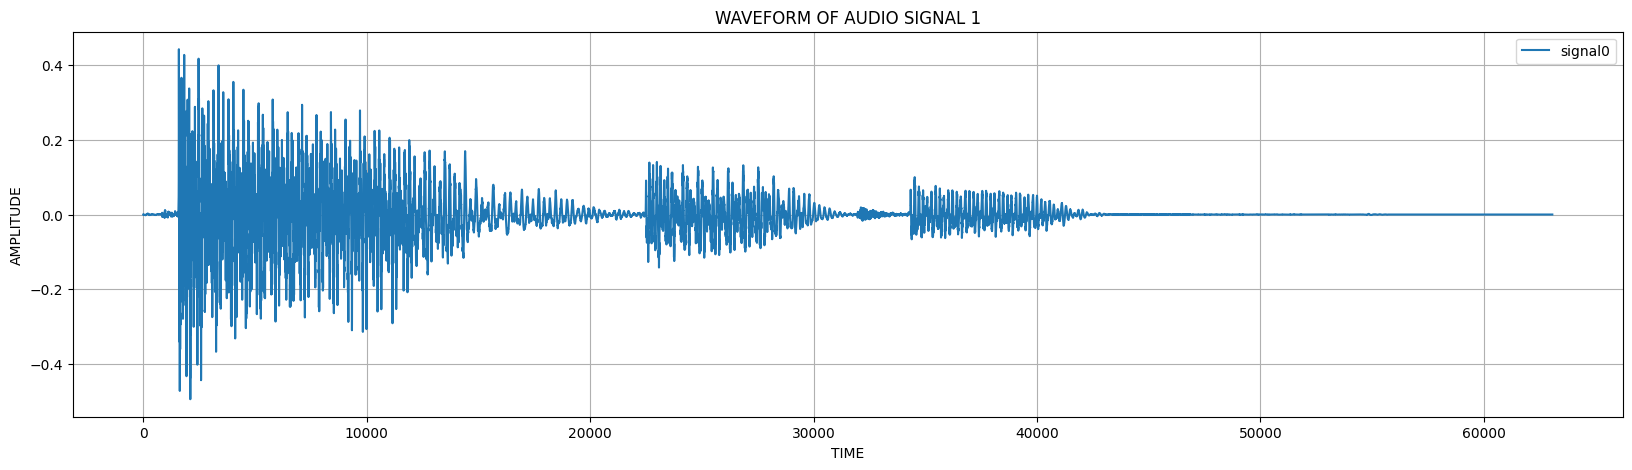

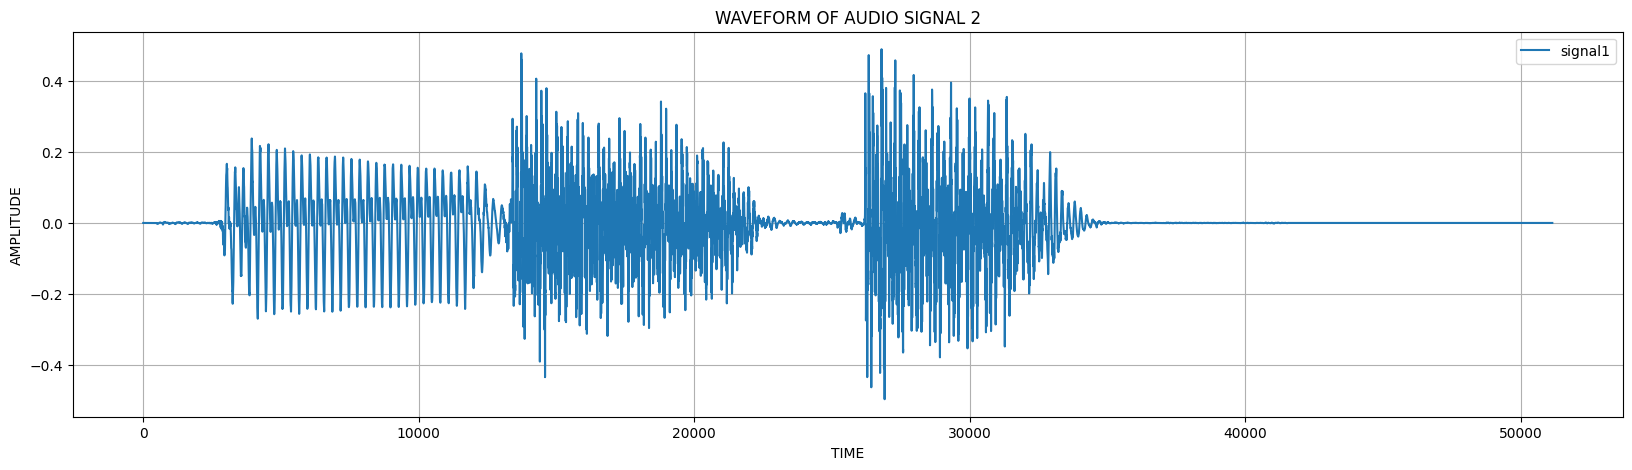

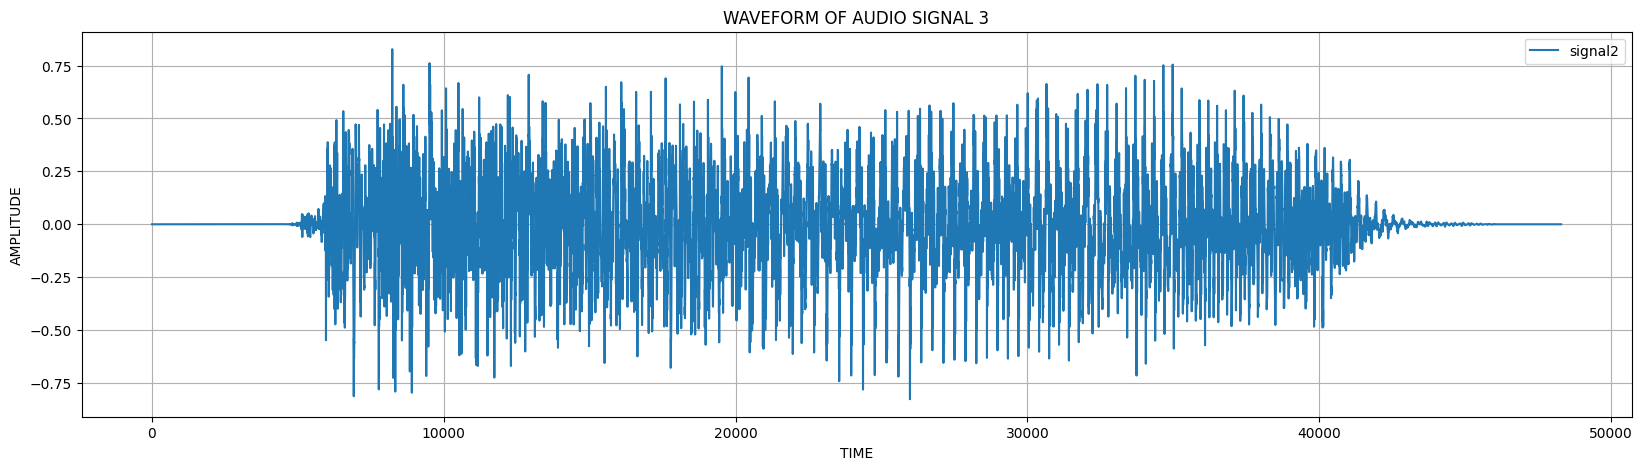

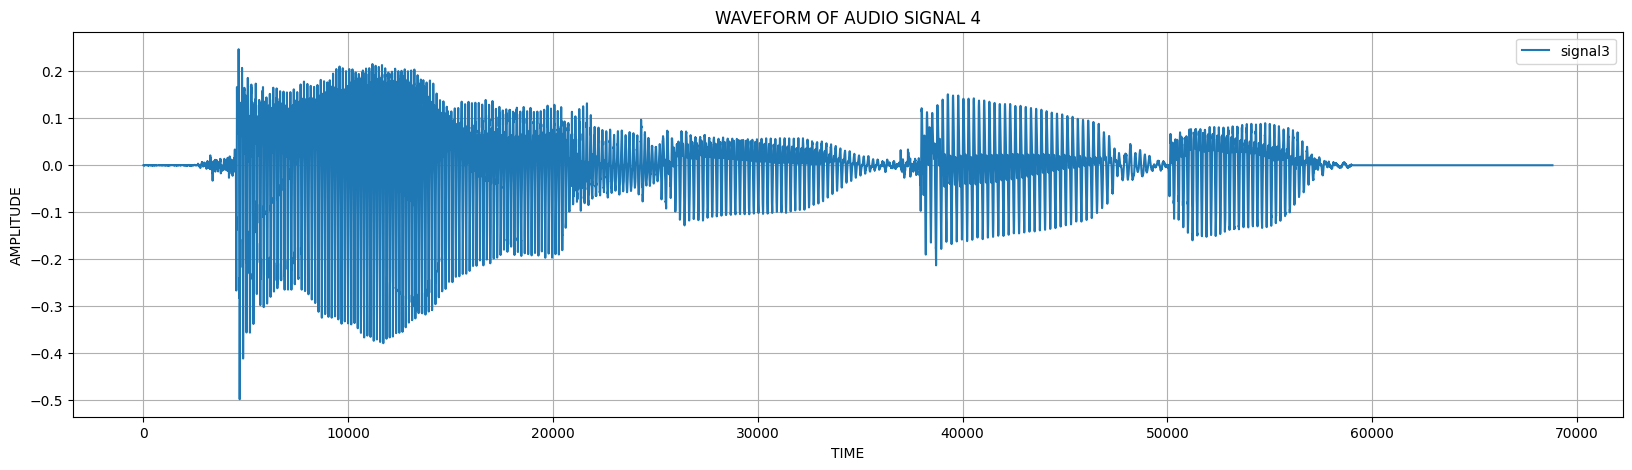

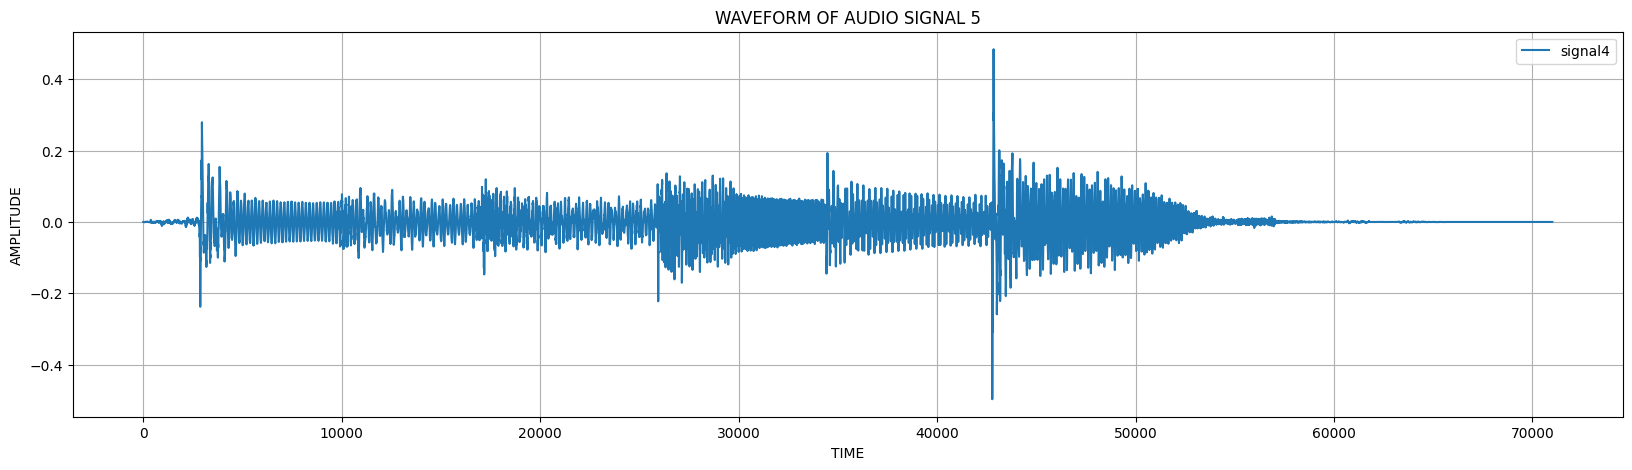

In [ ]:
signal=[signal1,signal2,signal3,signal4,signal5]
sr=[sr1,sr2,sr3,sr4,sr5]
for i in range(5):
  plt.figure(figsize=(20,5))
  plt.plot(signal[i],label='signal'+str(i))
  plt.title('WAVEFORM OF AUDIO SIGNAL '+str(i+1))
  plt.xlabel('TIME')
  plt.ylabel('AMPLITUDE')
  plt.grid()
  plt.legend()
  plt.show()

3) Perform the Fourier Transform (FT) and plot the magnitude spectrum.

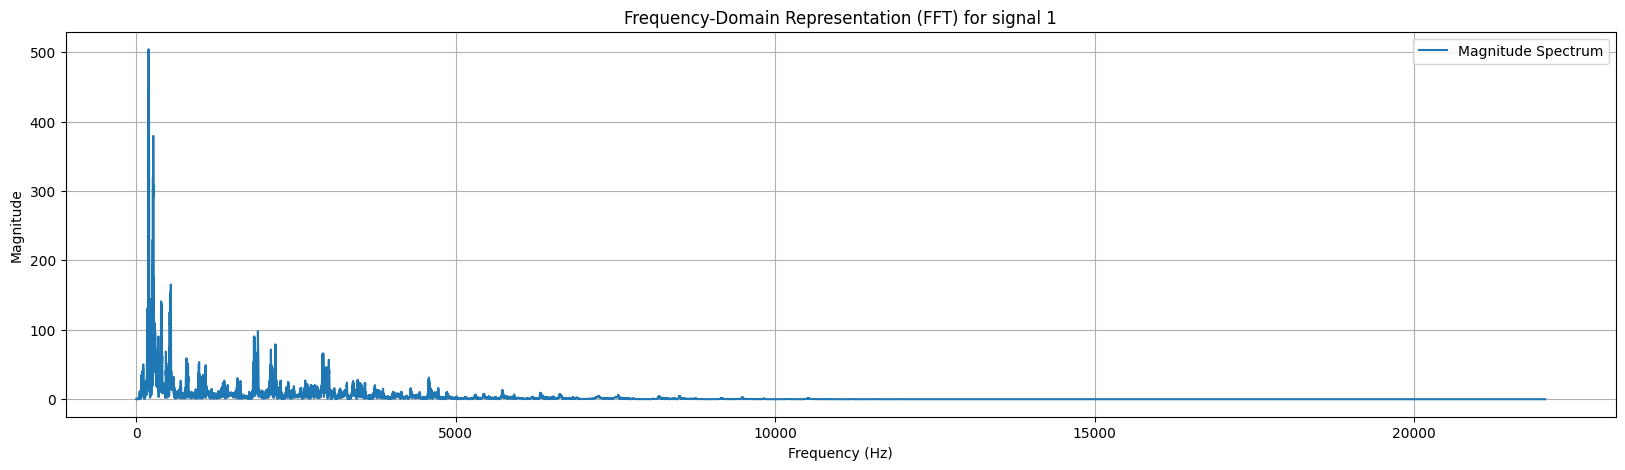

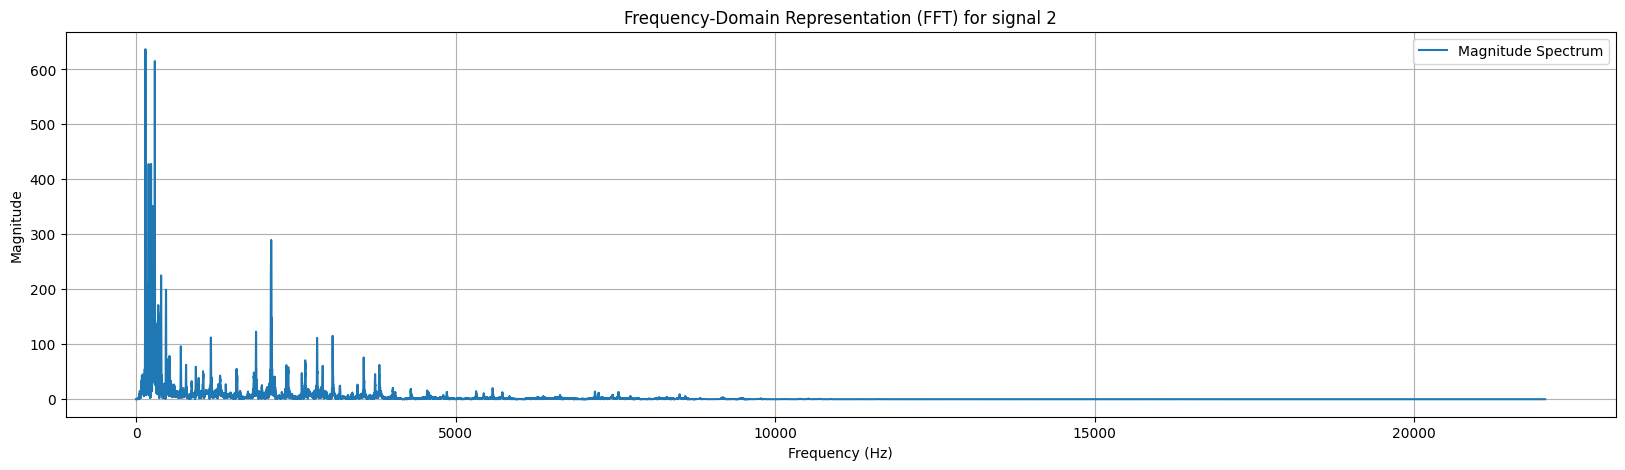

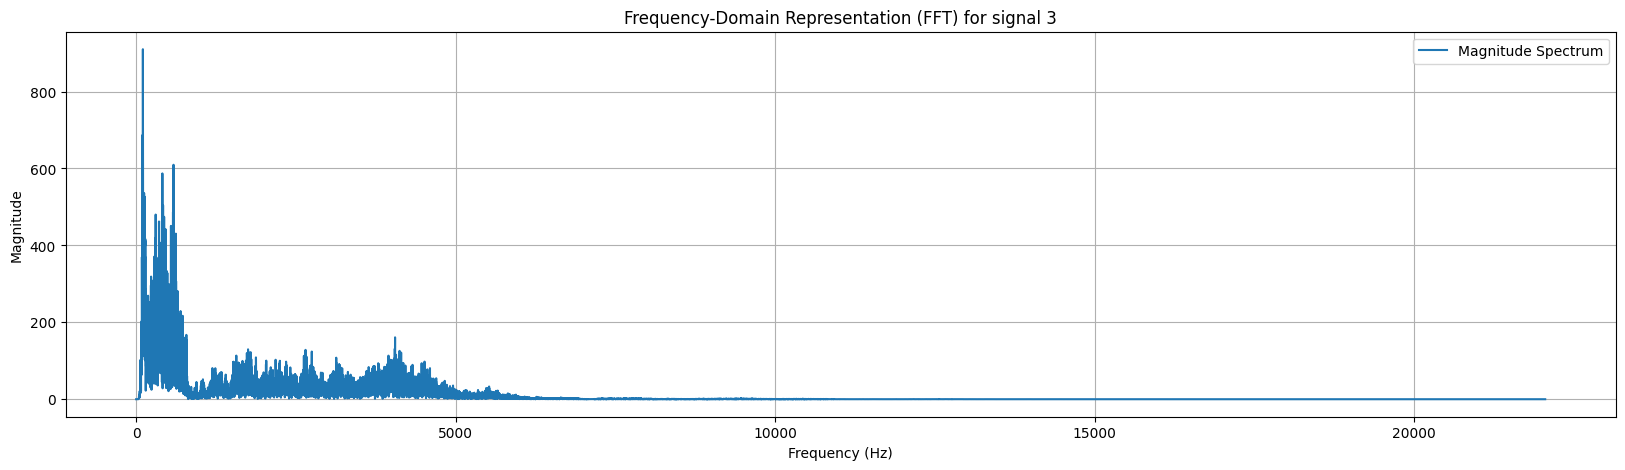

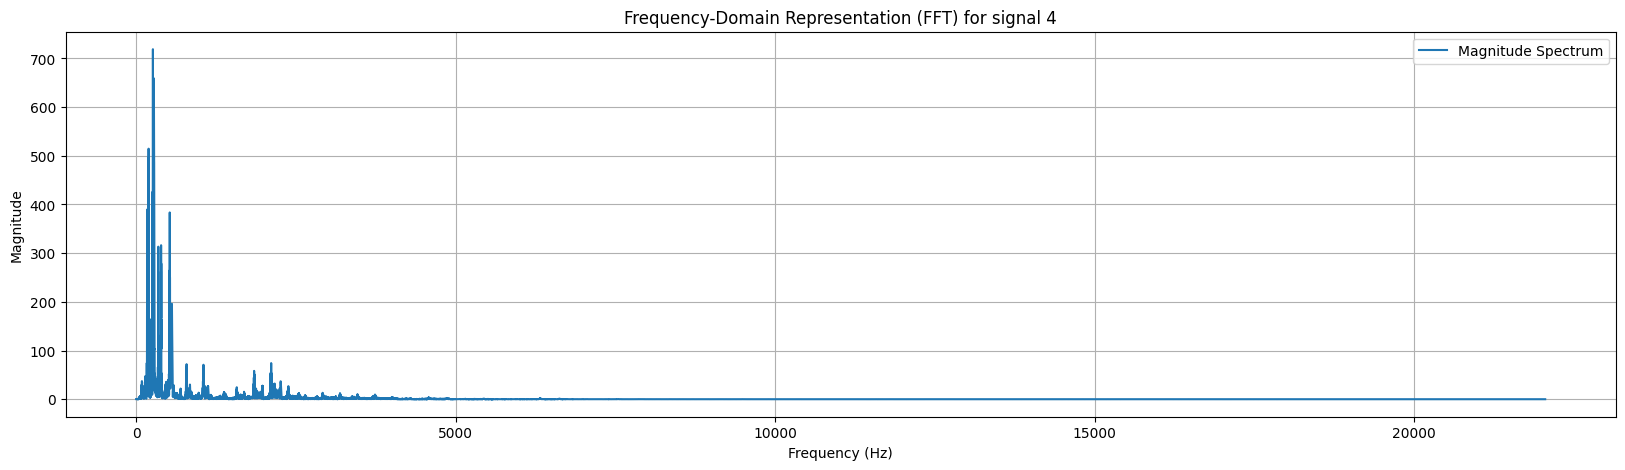

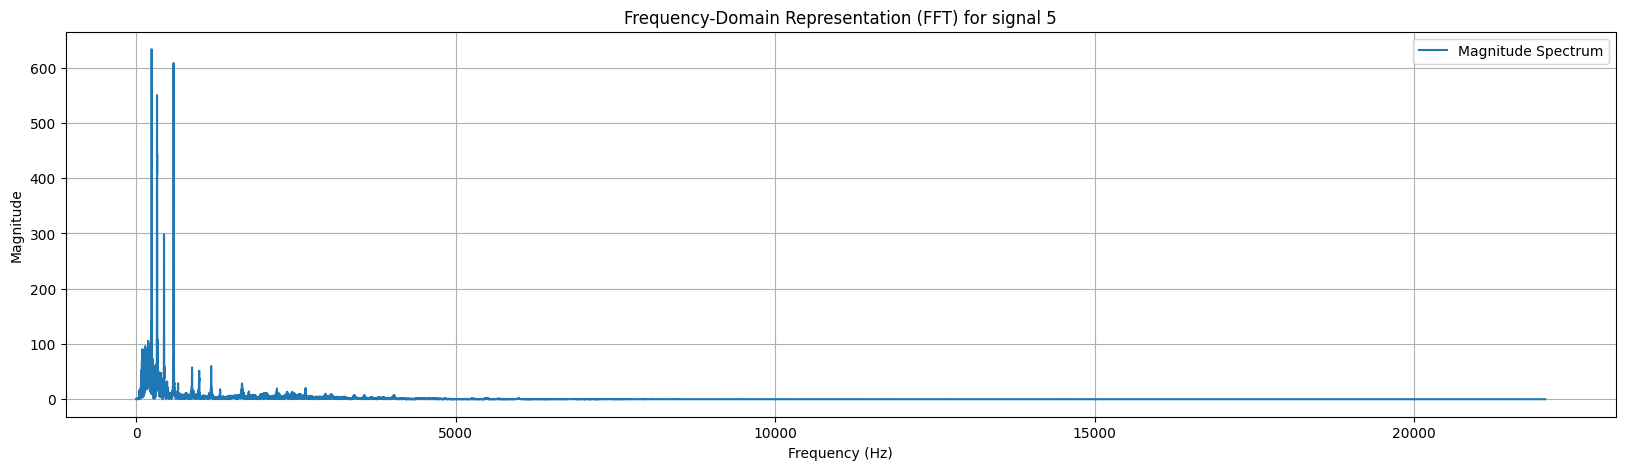

In [ ]:
for i in range(5):
  n=len(signal[i])
  ft=np.fft.fft(signal[i])
  freq=np.fft.fftfreq(n,1/sr[i])
  mag=np.abs(ft)
  plt.figure(figsize=(20,5))
  plt.plot(freq[:n//2],mag[:n//2],label="Magnitude Spectrum")
  plt.title("Frequency-Domain Representation (FFT) for signal "+str(i+1))
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")
  plt.grid(True)
  plt.legend()

4) Compute and visualize the STFT for the audio signal using scipy.signal.stft.

Experiment with different window sizes (e.g., 256, 1024, 4096).
Discuss the trade-off between time and frequency resolution.

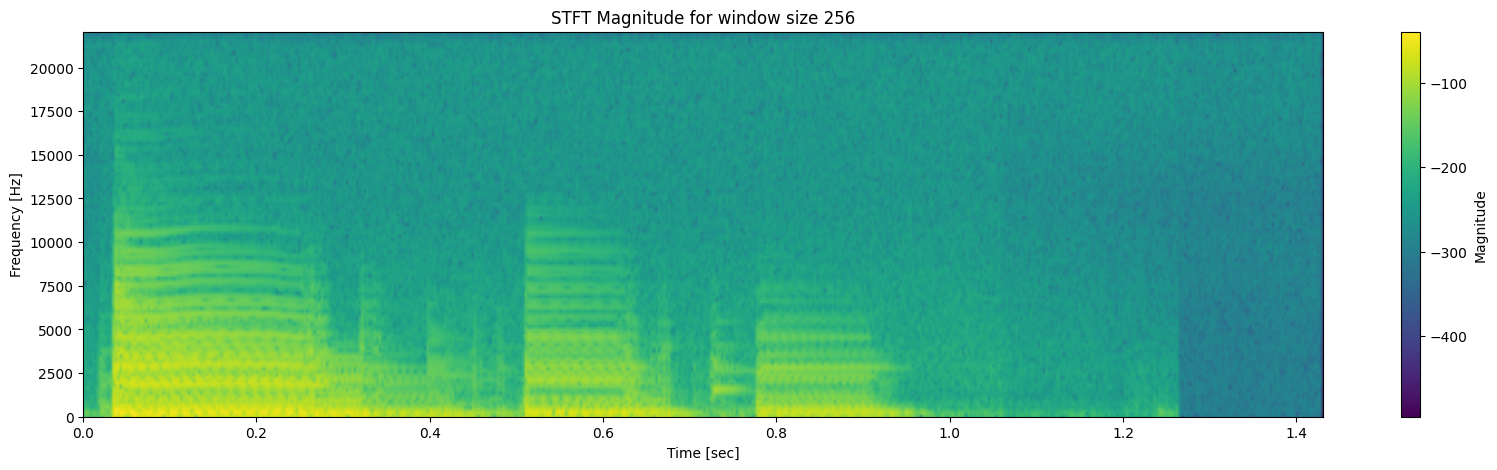

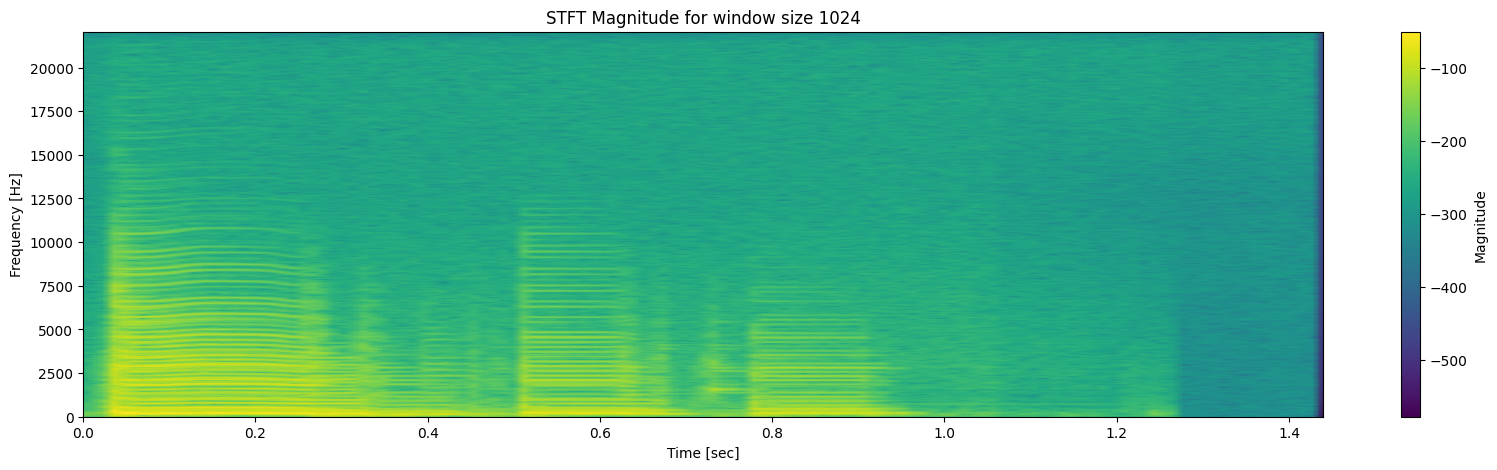

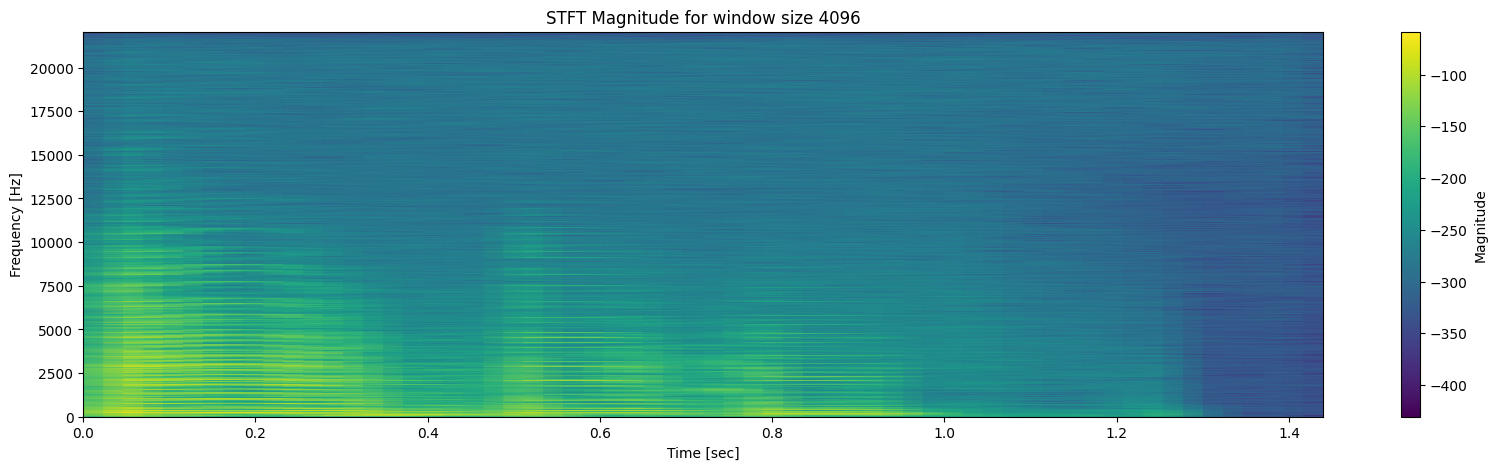

In [ ]:
from scipy.signal import stft
window_sizes=[256,1024,4096]
for window_size in window_sizes:
  f, t, Zxx = stft(signal[0], sr1, nperseg=window_size)
  plt.figure(figsize=(20,5))
  mag=np.abs(Zxx)
  plt.pcolormesh(t, f,20*np.log(mag), shading='gouraud')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.colorbar(label='Magnitude')
  plt.title('STFT Magnitude for window size '+str(window_size))
  plt.show()

As we increase window size frequency resolution increases as we increase the number of points and with increase in window size the time resolution decreases as there are less number of times we have to slide it with the new size

# Spectrogram Visualization

1) Create spectrogram for the audio files uploaded  using librosa.display.specshow.

<ipython-input-51-d2cb2d6babc4>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spect=librosa.amplitude_to_db(librosa.stft(signal[i]),ref=np.max)


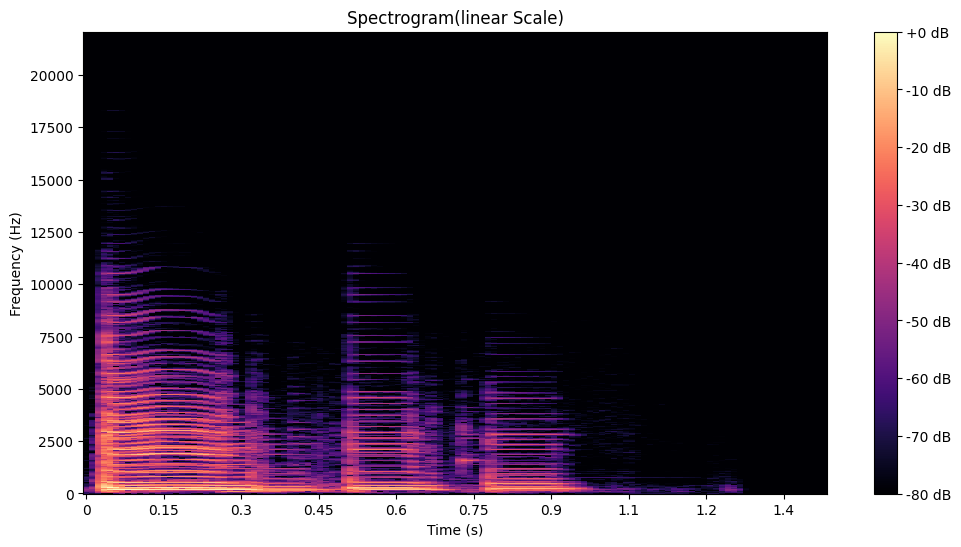

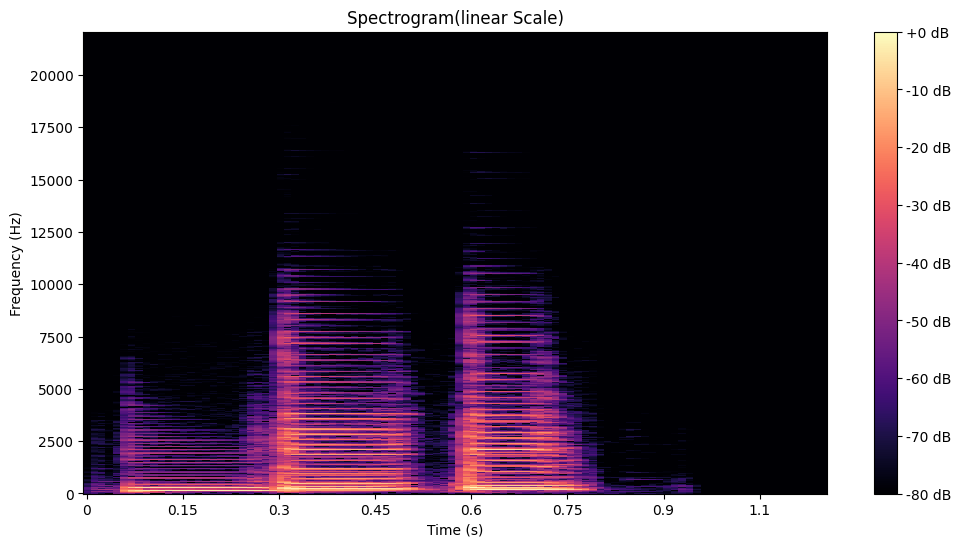

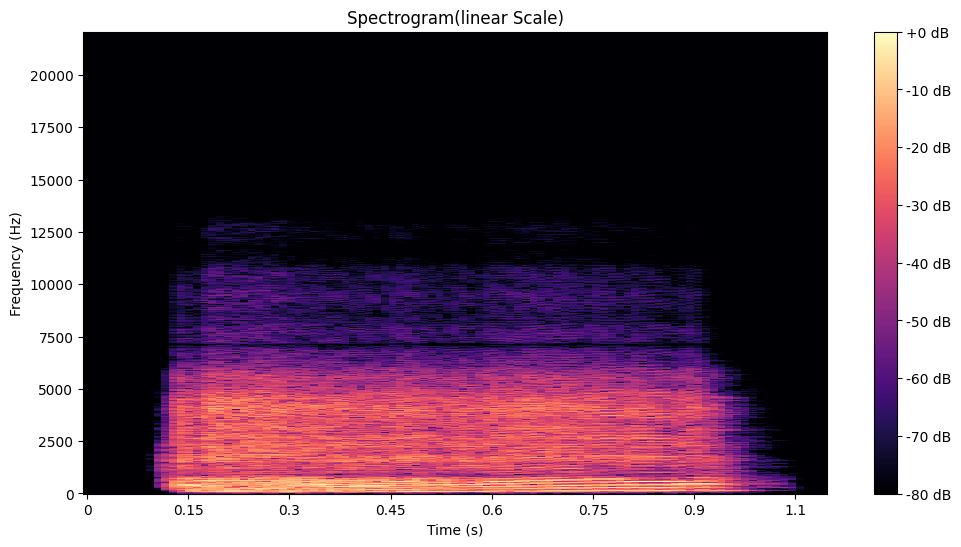

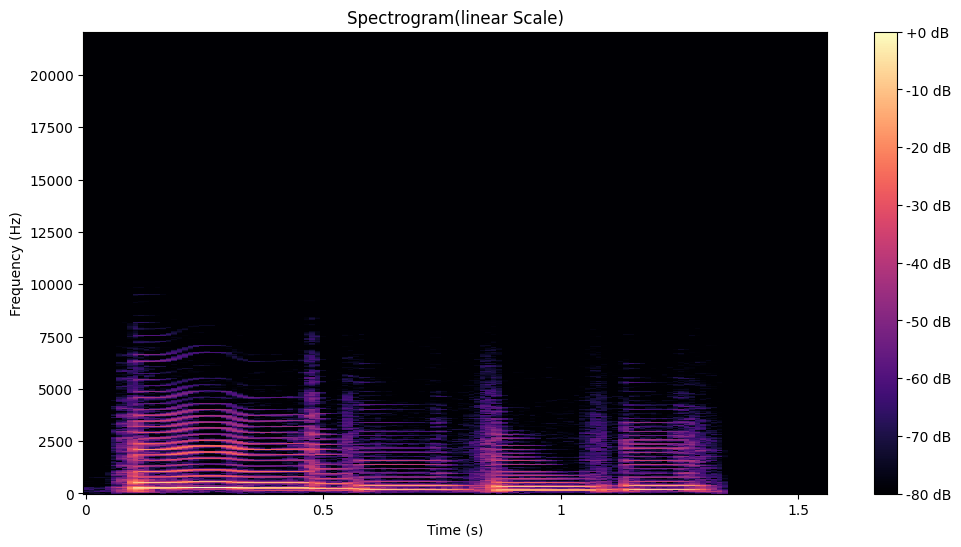

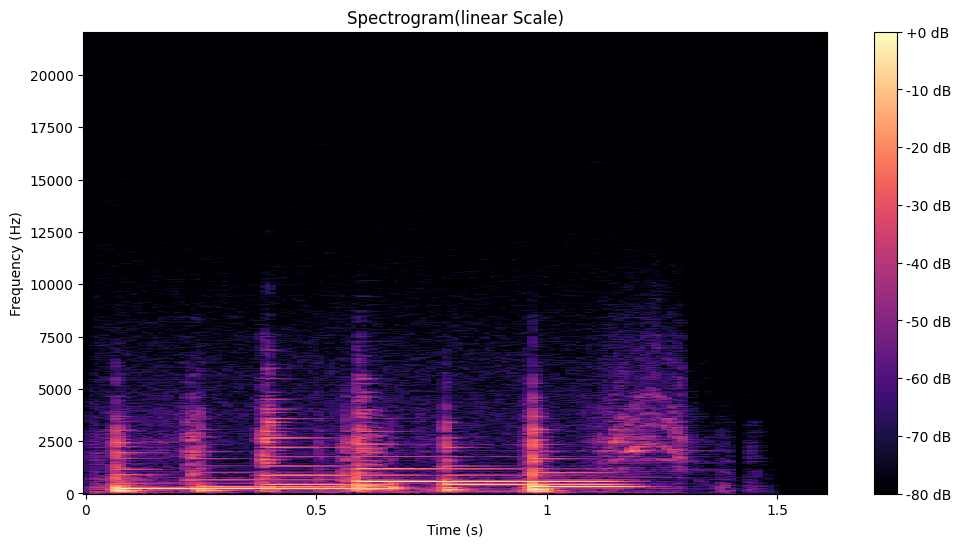

In [ ]:
import librosa.display

for i in range(5):
  spect=librosa.amplitude_to_db(librosa.stft(signal[i]),ref=np.max)
  plt.figure(figsize=(12,6))
  librosa.display.specshow(spect, sr=sr[i], x_axis='time',y_axis='linear')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Spectrogram(linear Scale)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()

2) Experiment with
logarithmic scaling for frequency and
different color maps for better visualization.

<ipython-input-20-1e2817f410b1>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spect=librosa.amplitude_to_db(librosa.stft(signal[i]),ref=np.max)


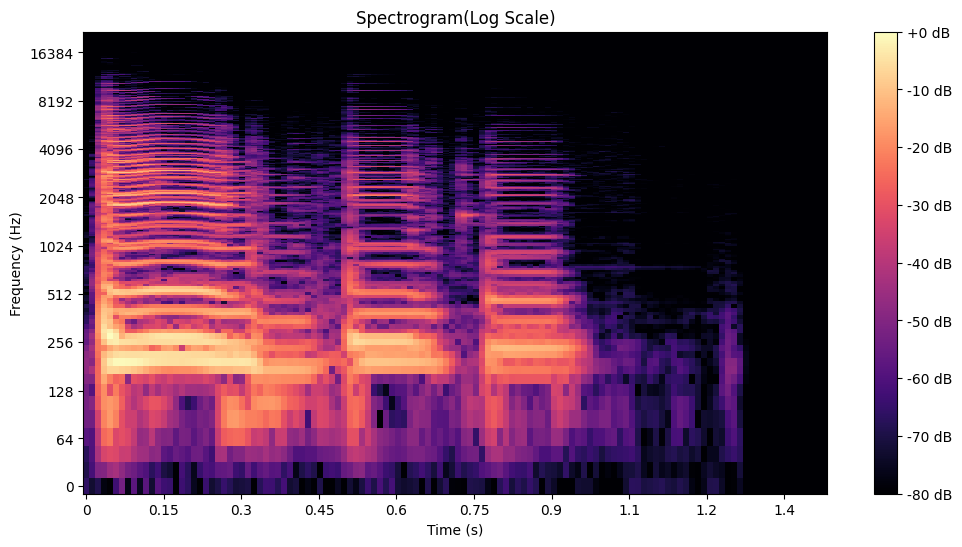

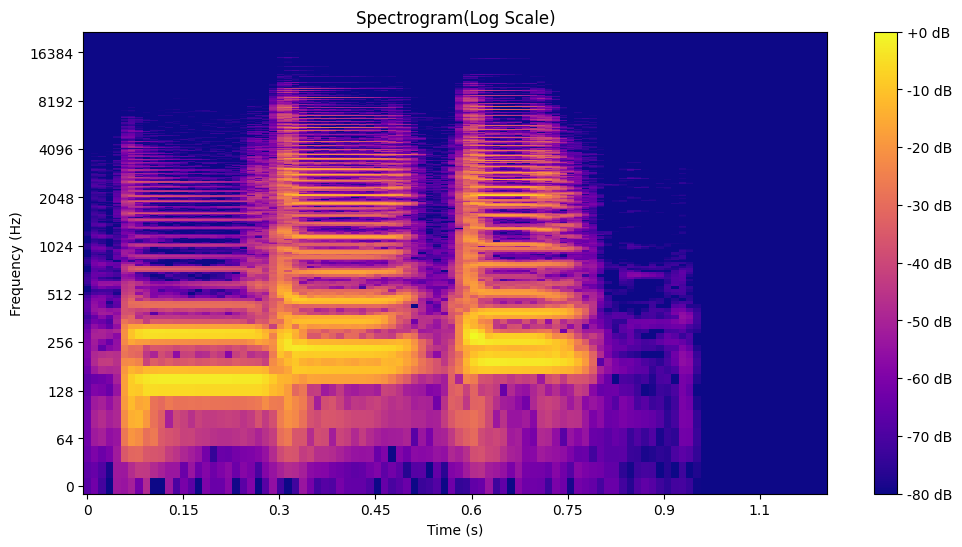

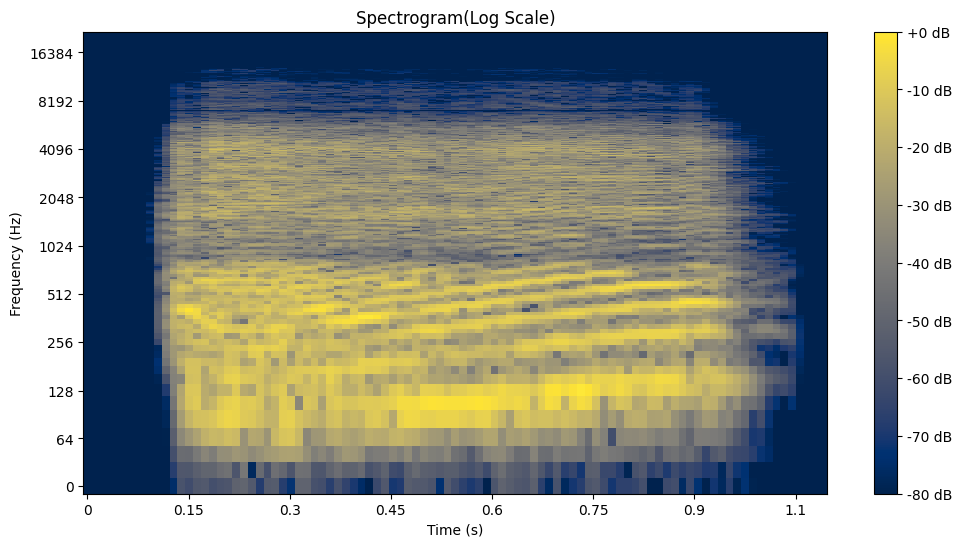

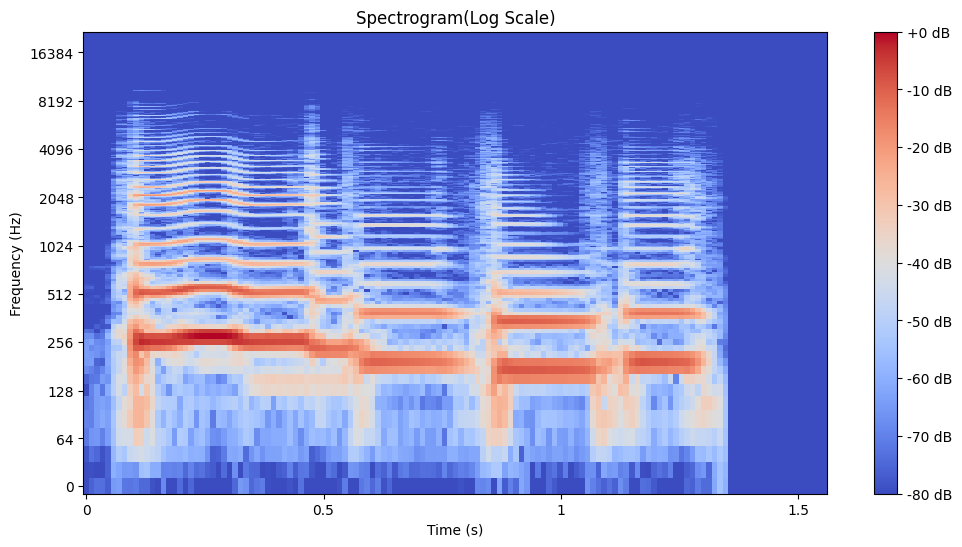

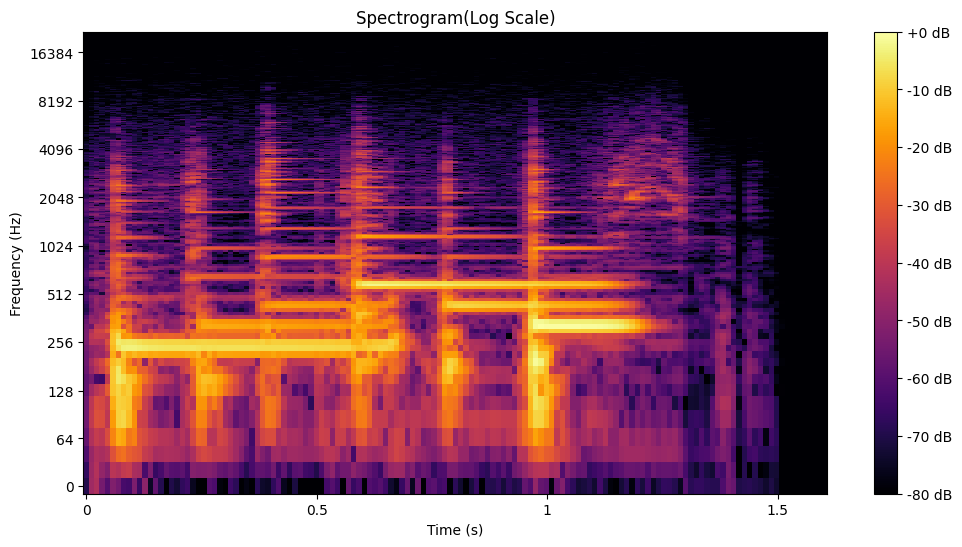

In [ ]:
import librosa.display
c=['magma', 'plasma', 'cividis', 'coolwarm', 'inferno']
for i in range(5):
  spect=librosa.amplitude_to_db(librosa.stft(signal[i]),ref=np.max)
  plt.figure(figsize=(12,6))
  librosa.display.specshow(spect, sr=sr[i], x_axis='time',y_axis='log',cmap=c[i])
  plt.colorbar(format='%+2.0f dB')
  plt.title('Spectrogram(Log Scale)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.show()

3) Discuss how the spectrogram helps visualize frequency changes over time.

In [ ]:
print(" spectogram helps in visualising frequency changes over time as we can see which frequencies are becoming prominent over time and which are not and check for patterns with time if present ")

 spectogram helps in visualising frequency changes over time as we can see which frequencies are becoming prominent over time and which are not and check for patterns with time if present 


# Quantization

1) Simulate a 50 Hz sine wave sampled at 1000 Hz.

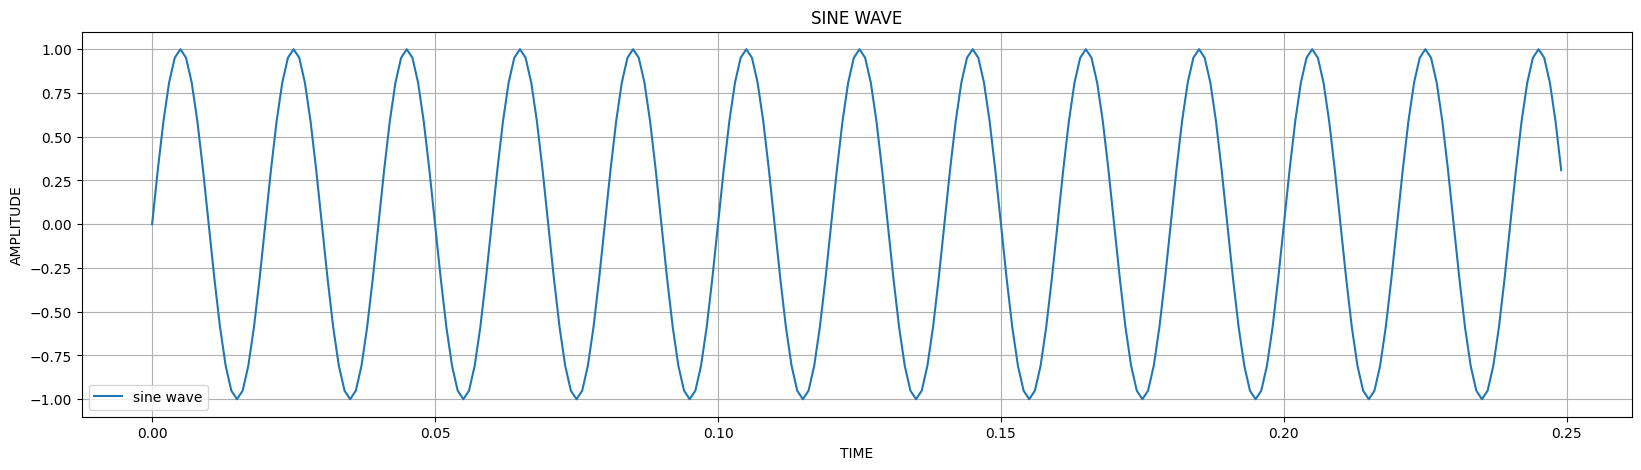

In [6]:
freq=50
sr=1000
duration=0.25
time=np.linspace(0,duration,int(sr*duration),endpoint=False)
sineval=np.sin(2*np.pi*freq*time)
plt.figure(figsize=(20,5))
plt.plot(time,sineval,label='sine wave')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('SINE WAVE')
plt.grid()
plt.legend()

2) Quantize the signal with different bit depths (e.g., 8-bit, 4-bit).

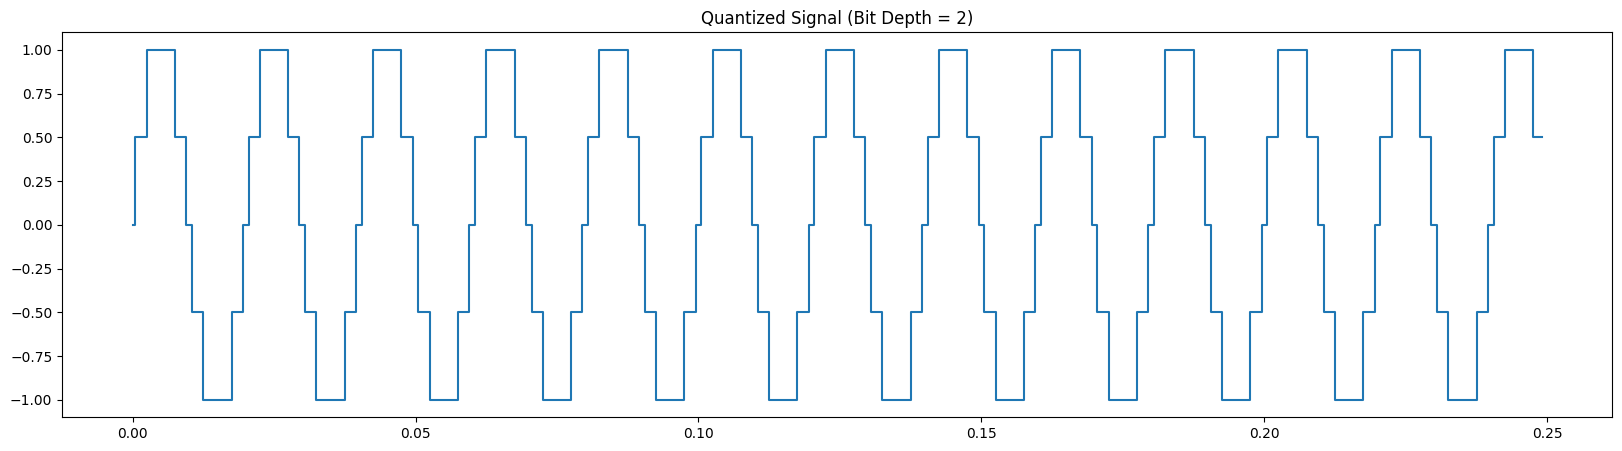

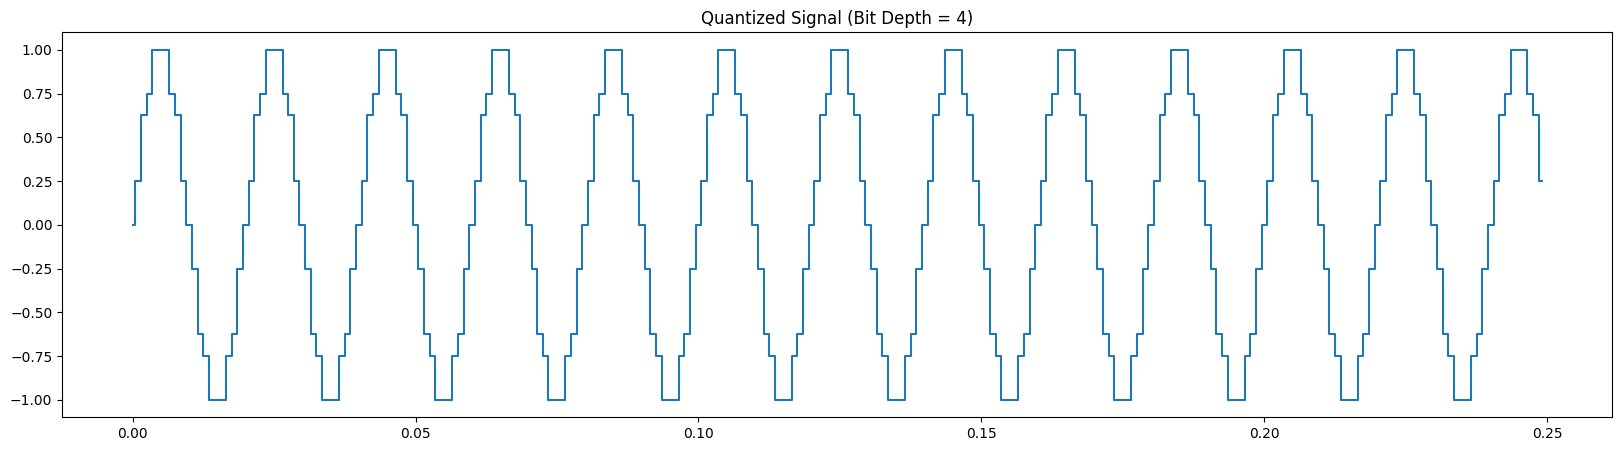

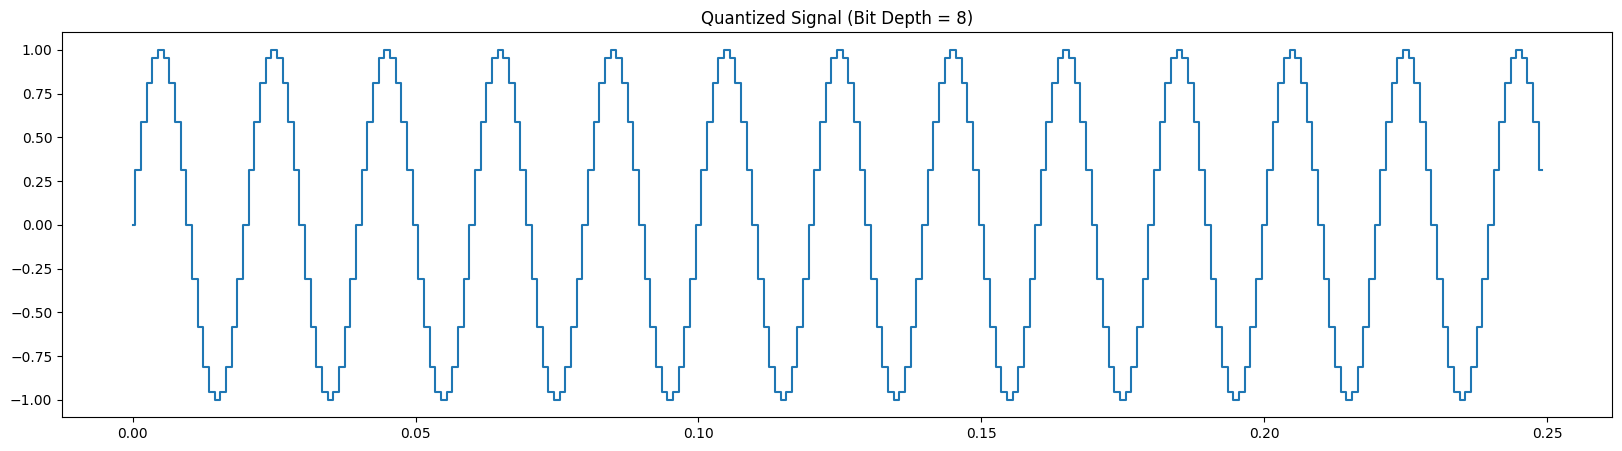

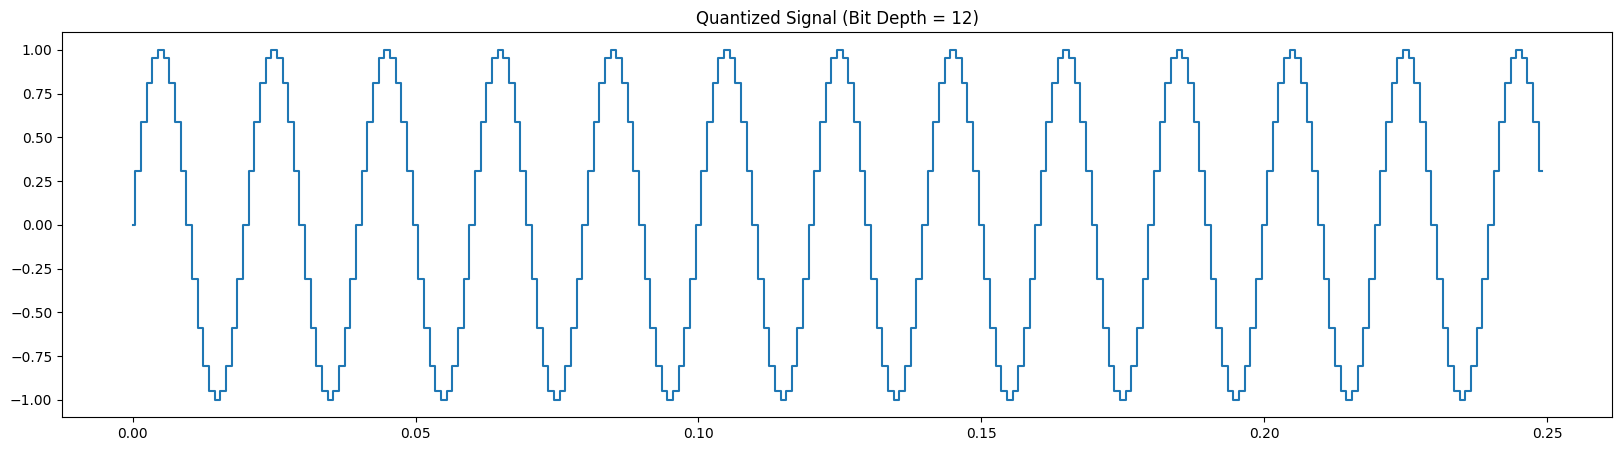

In [7]:
bit_depths = [2, 4, 8, 12]
quantized_signals = []

for i, bit_depth in enumerate(bit_depths):
    n_lvl = 2 ** bit_depth
    step_size = 2 / n_lvl
    quantized_signal = np.round(sineval / step_size) * step_size
    quantized_signals.append(quantized_signal)
    plt.figure(figsize=(20, 5))
    plt.title(f"Quantized Signal (Bit Depth = {bit_depth})")
    plt.step(time, quantized_signals[i], label=f"Quantized Signal (Bit Depth = {bit_depth})", where='mid')
    plt.show()

3) Plot and compare
the original signal and the
quantized signals for each bit depth.

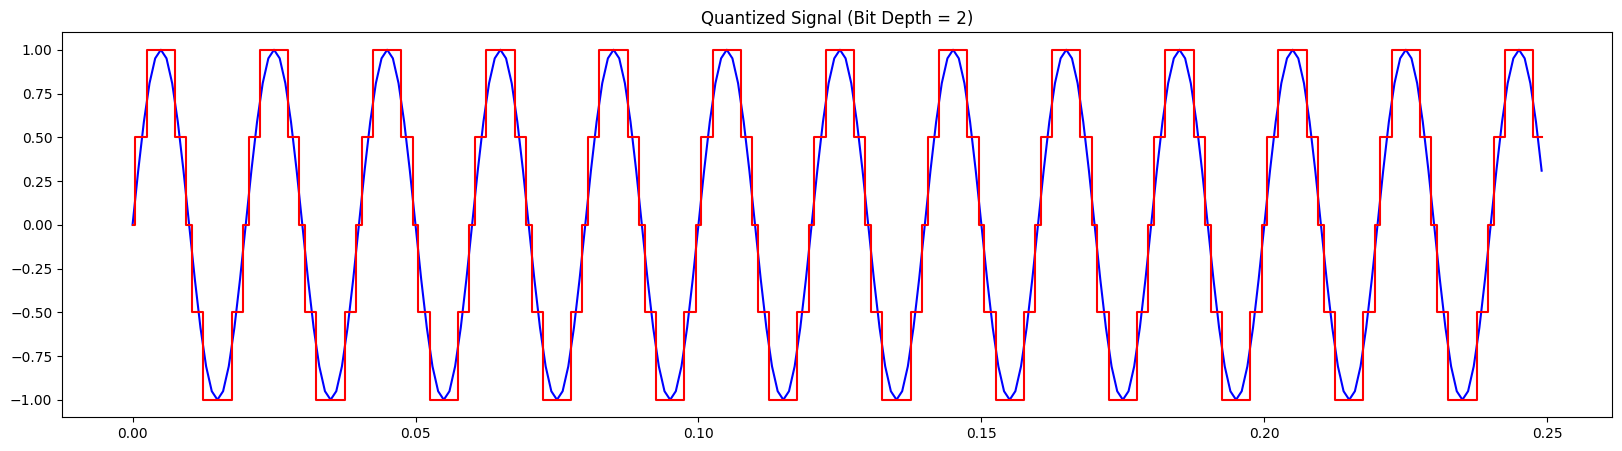

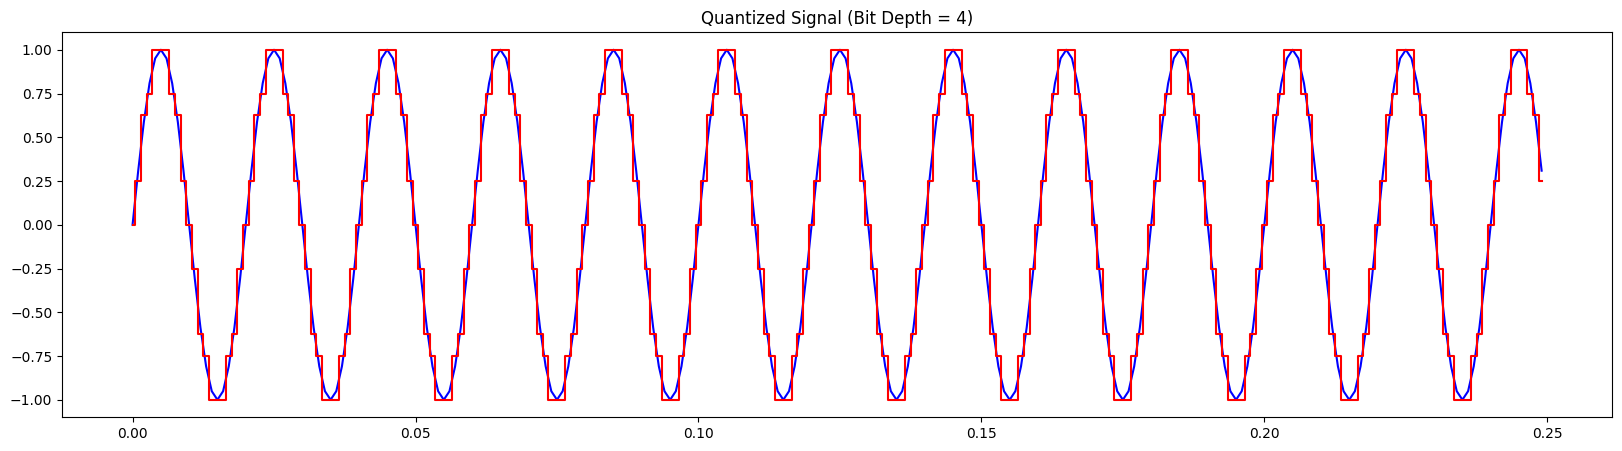

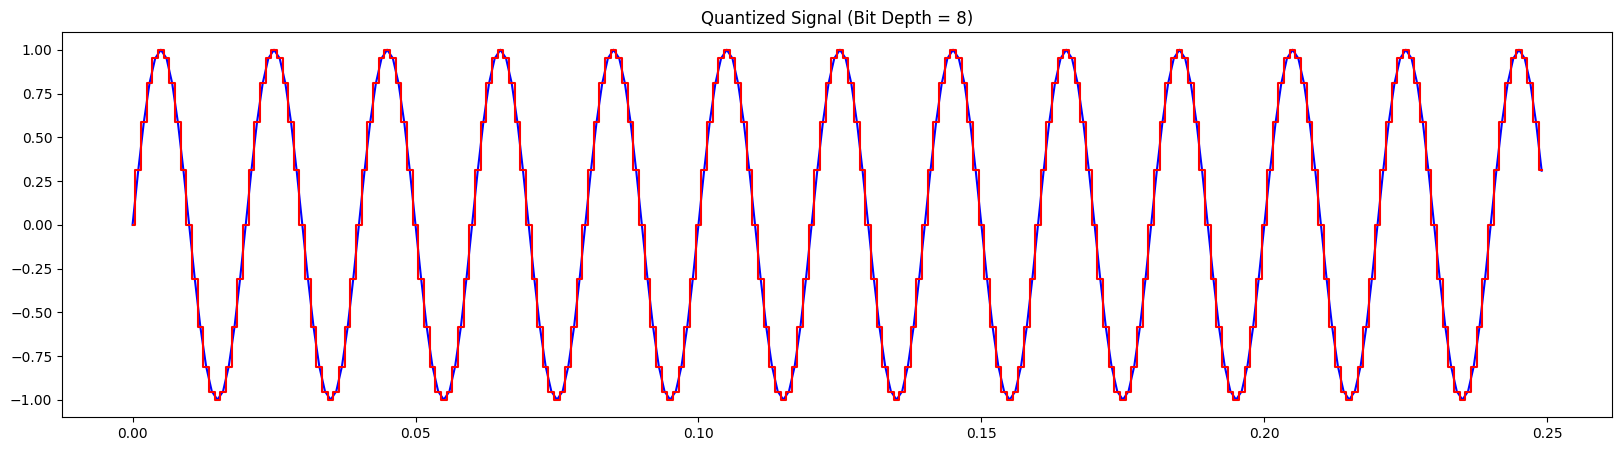

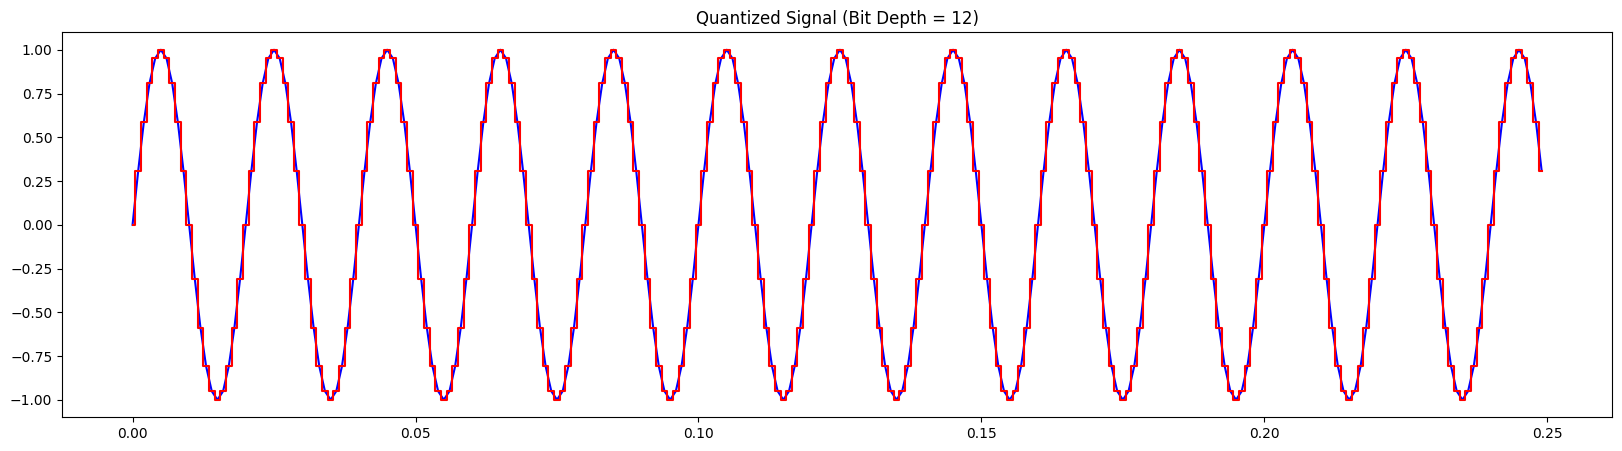

In [8]:
bit_depths = [2, 4, 8, 12]

for i, bit_depth in enumerate(bit_depths):
    quantized_signal = quantized_signals[i]
    plt.figure(figsize=(20, 5))
    plt.plot(time, sineval, label='Original Signal', color='blue')
    plt.title(f"Quantized Signal (Bit Depth = {bit_depth})")
    plt.step(time, quantized_signals[i], label=f"Quantized Signal (Bit Depth = {bit_depth})", where='mid', color='red')
    plt.show()